In [1]:
from sklearn.manifold import TSNE, Isomap
import pacmap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import umap
import umap.plot
from umap import UMAP
import numpy as np
from sklearn.datasets import fetch_rcv1
from sklearn.datasets import fetch_20newsgroups
import os

import warnings
warnings.filterwarnings('ignore')

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_path = os.getcwd()
datasets_path = os.path.join(project_path, 'datasets_with_labels')
ivhd_path = os.path.join(project_path, 'ivhd_visualization_files')
visualizations_path = os.path.join(project_path, 'visualizations/images/')
embeddings_path = os.path.join(project_path, 'visualizations/data_embedded/')

In [3]:
def save_embedded_data_to_csv(embedded_data, filename):
    pd.DataFrame(embedded_data).to_csv(embeddings_path + filename + '.csv', header=None, index=None)

# MNIST

In [4]:
def plot_2d_mnist_scatter(X, y, title):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}")
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.title(title)
    plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(visualizations_path))
    plt.savefig(title + '.png')
    plt.show()

In [5]:
mnist_path = os.path.join(datasets_path, 'mnist.csv')
df_mnist = pd.read_csv(mnist_path, header=None)

In [6]:
X_mnist = df_mnist.iloc[:, :-1]
y_mnist = df_mnist.iloc[:, -1]

## MNIST TSNE

In [6]:
mnist_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_mnist)

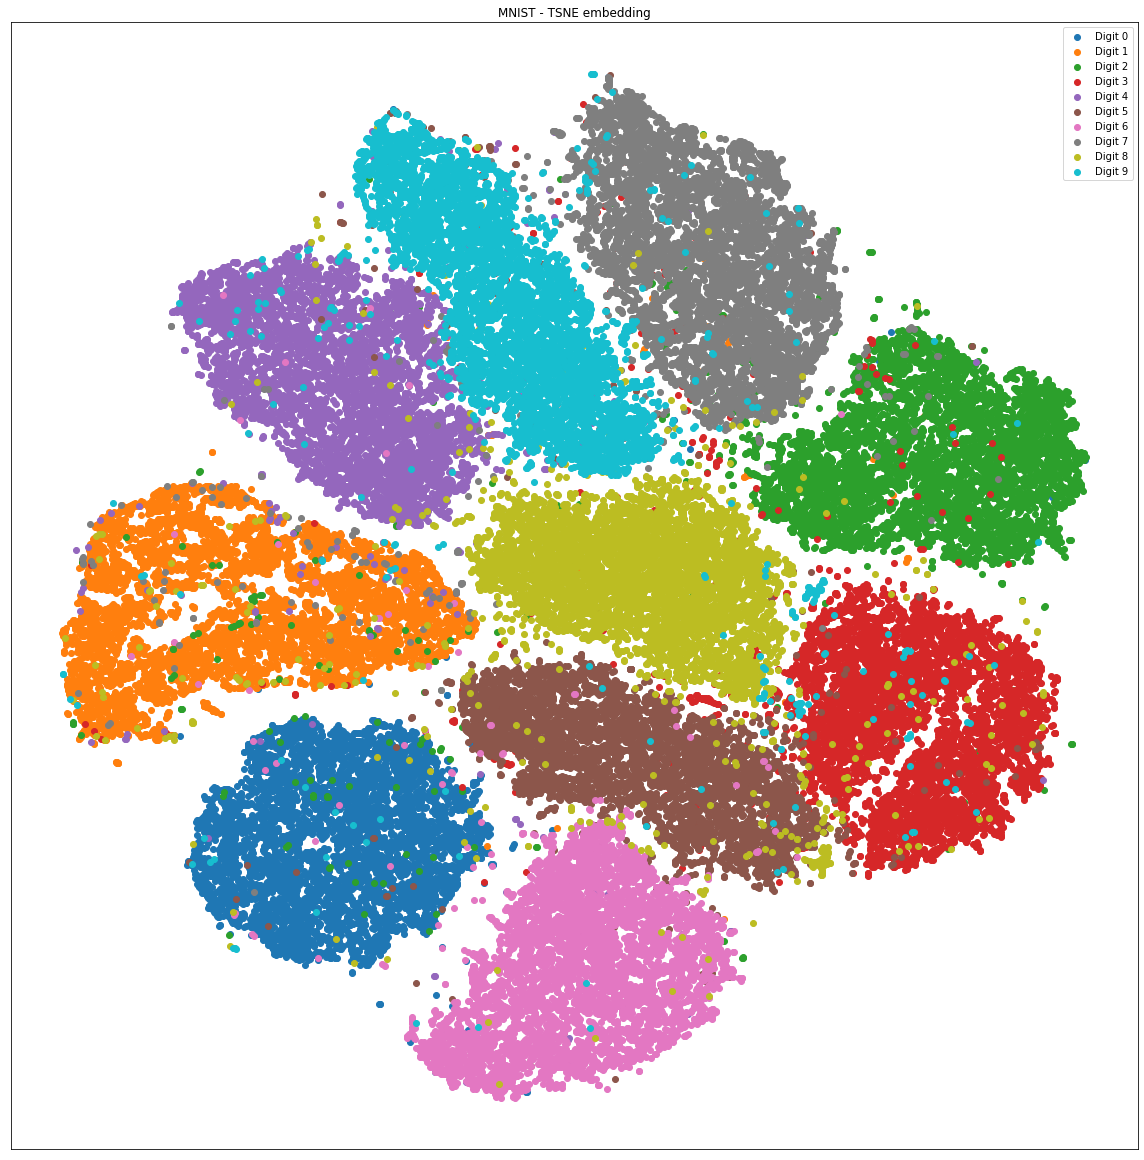

In [7]:
plot_2d_mnist_scatter(mnist_tsne, y_mnist, 'MNIST - TSNE embedding')

## MNIST UMAP

In [8]:
mnist_umap_reducer=UMAP()
mnist_umap=mnist_umap_reducer.fit_transform(X_mnist)

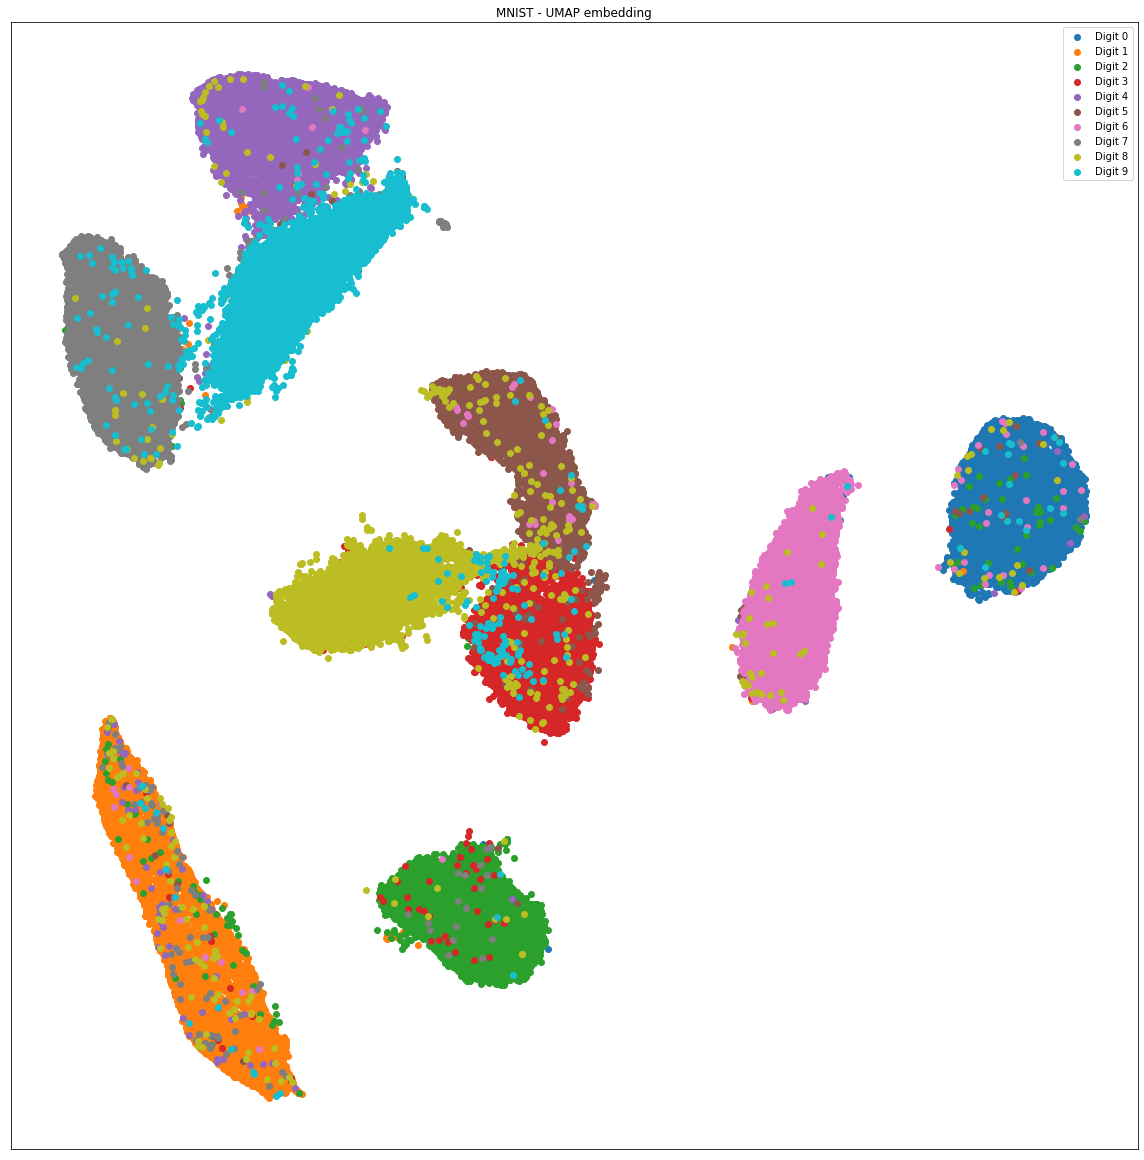

In [9]:
plot_2d_mnist_scatter(mnist_umap, y_mnist, 'MNIST - UMAP embedding')

## MNIST PaCMAP

In [9]:
mnist_pacmap_embedding = pacmap.PaCMAP()
mnist_pacmap = mnist_pacmap_embedding.fit_transform(X_mnist)

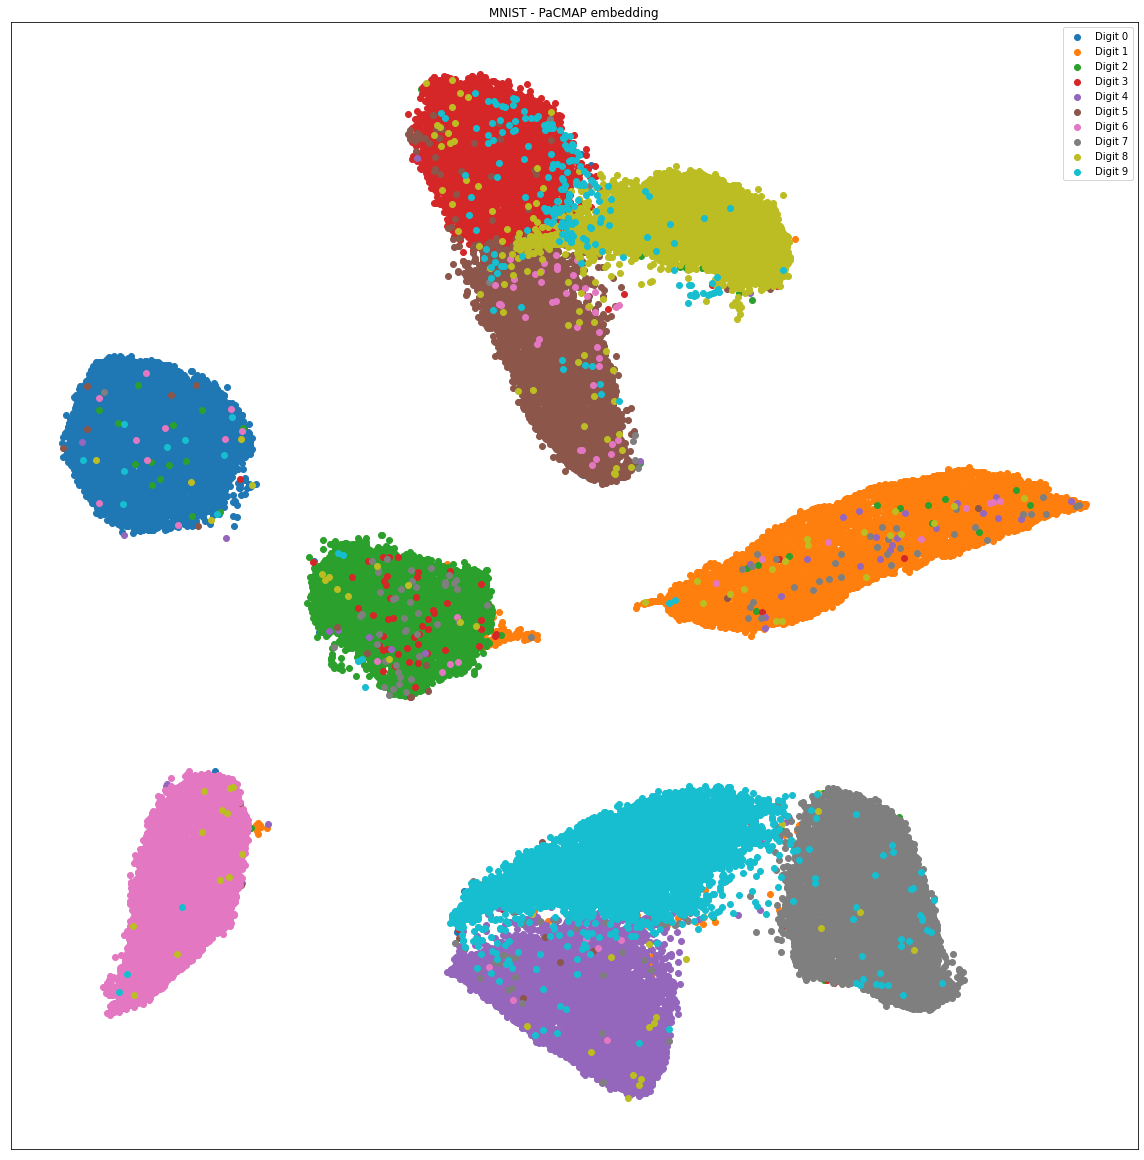

In [10]:
plot_2d_mnist_scatter(mnist_pacmap, y_mnist, 'MNIST - PaCMAP embedding')

In [11]:
save_embedded_data_to_csv(mnist_pacmap, 'mnist_pacmap_embedding')

## MNIST IVHD

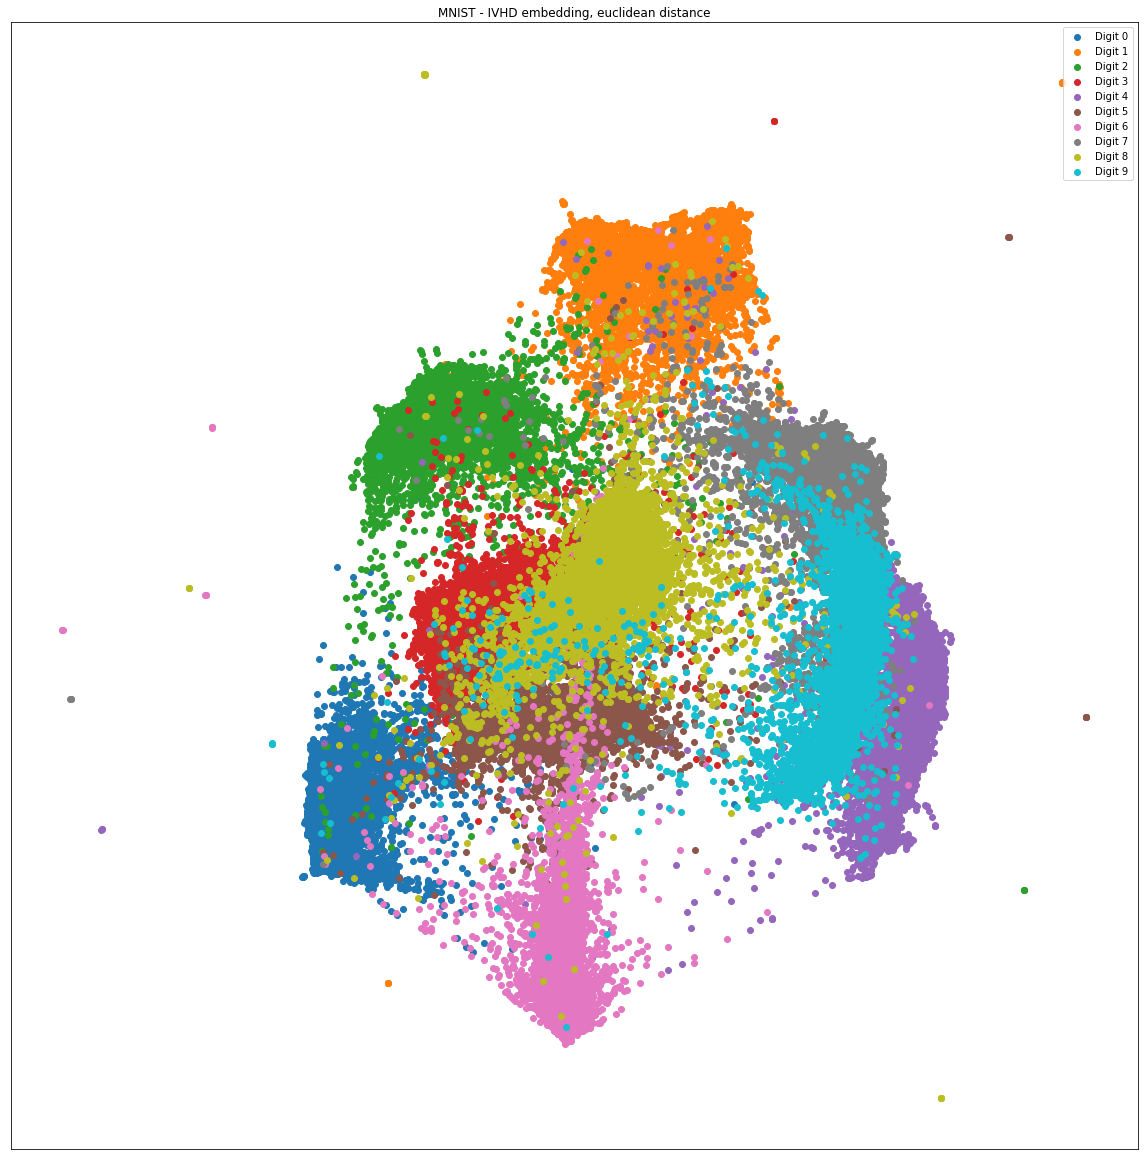

In [11]:
df_mnist_ivhd_euclidean = pd.read_csv(os.path.join(ivhd_path, 'mnist_euclidean_visualization.txt'), header=None)
plot_2d_mnist_scatter(df_mnist_ivhd_euclidean.iloc[:, :2].values, df_mnist_ivhd_euclidean.iloc[:, 2].values, 'MNIST - IVHD embedding, euclidean distance')

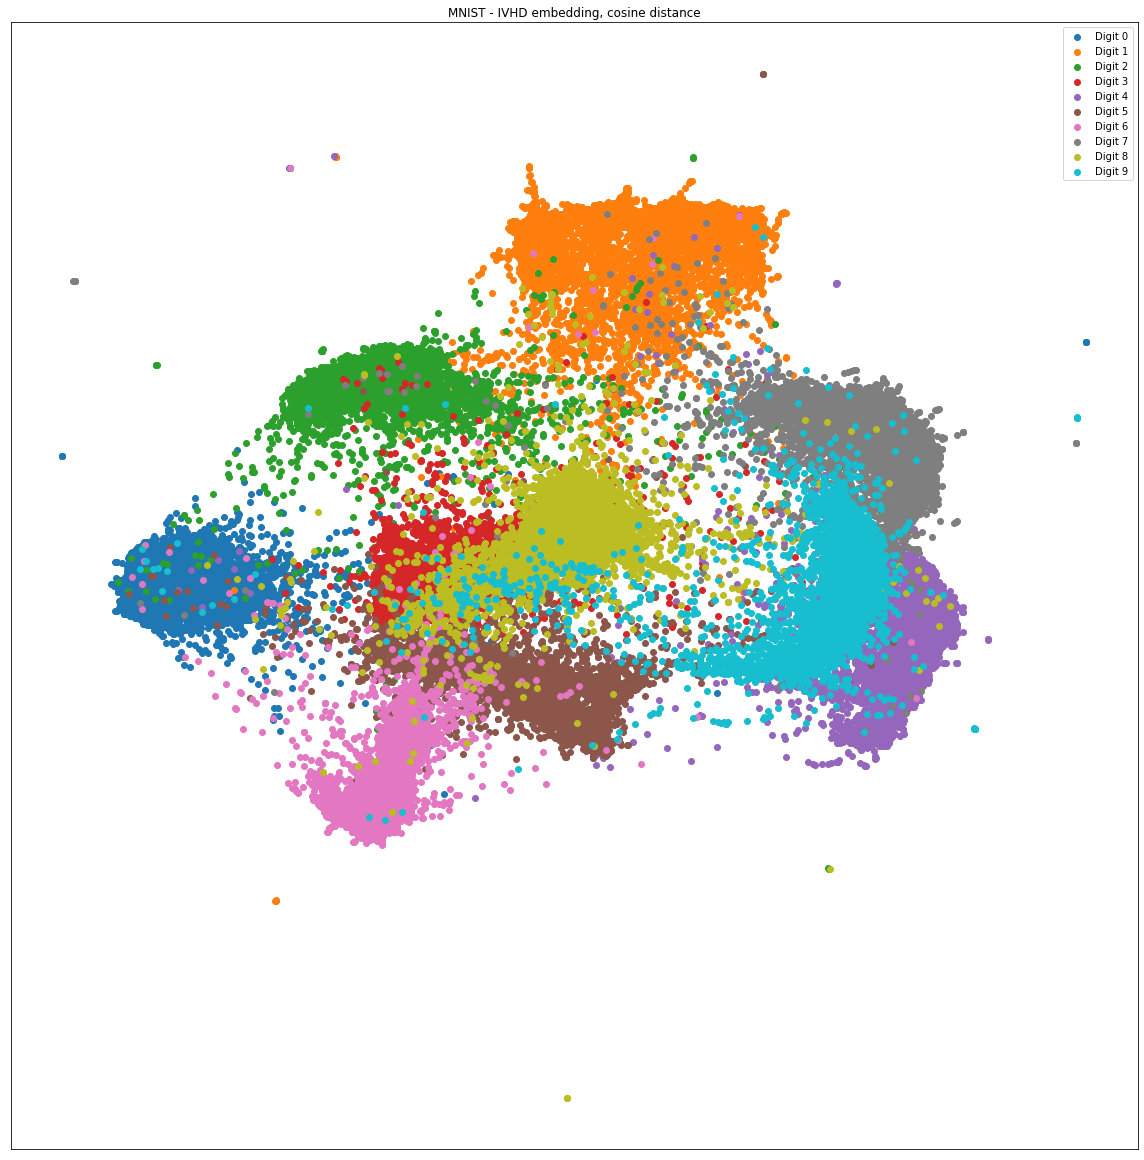

In [12]:
df_mnist_ivhd_cosine = pd.read_csv(os.path.join(ivhd_path, 'mnist_cosine_visualization.txt'), header=None)
plot_2d_mnist_scatter(df_mnist_ivhd_cosine.iloc[:, :2].values, df_mnist_ivhd_cosine.iloc[:, 2].values, 'MNIST - IVHD embedding, cosine distance')

# Reuters

In [4]:
df_reuters = pd.read_csv(os.path.join(datasets_path, 'reuters_reduced.csv'), header=None)
X_reuters = df_reuters.iloc[:, :-1]
y_reuters = df_reuters.iloc[:, -1]

In [5]:
reuters_original = fetch_rcv1(subset='test')

In [6]:
reuters_target_names = reuters_original.target_names

In [7]:
def plot_2d_reuters_scatter(X, y, target_names, title):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    cm = plt.get_cmap('gist_rainbow')
    cNorm  = colors.Normalize(vmin=0, vmax=23)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    plot.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(24)])
    plot.set_xticks(())
    plot.set_yticks(())
    for i in y.unique():
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"{target_names[i]}")
    plt.tight_layout()
    plt.legend()
    plt.title(title)
    plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(visualizations_path))
    plt.savefig(title + '.png')
    plt.show()

## RCV Reuters TSNE

In [27]:
reuters_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_reuters)

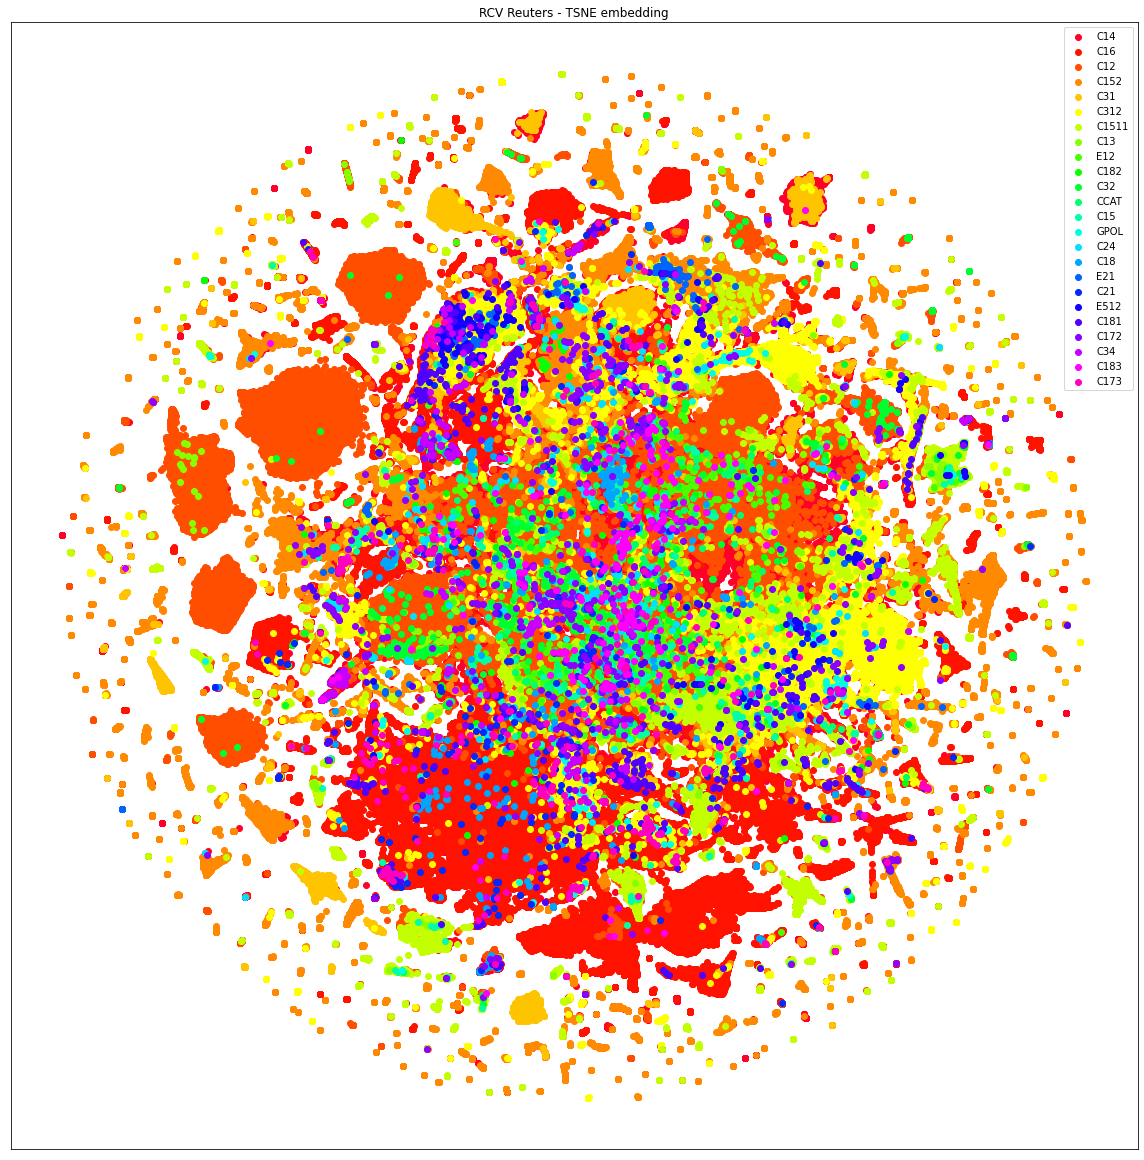

In [29]:
plot_2d_reuters_scatter(reuters_tsne, y_reuters, reuters_target_names, 'RCV Reuters - TSNE embedding')

## RCV Reuters UMAP

In [7]:
reuters_umap_reducer=UMAP()
reuters_umap=reuters_umap_reducer.fit_transform(X_reuters)

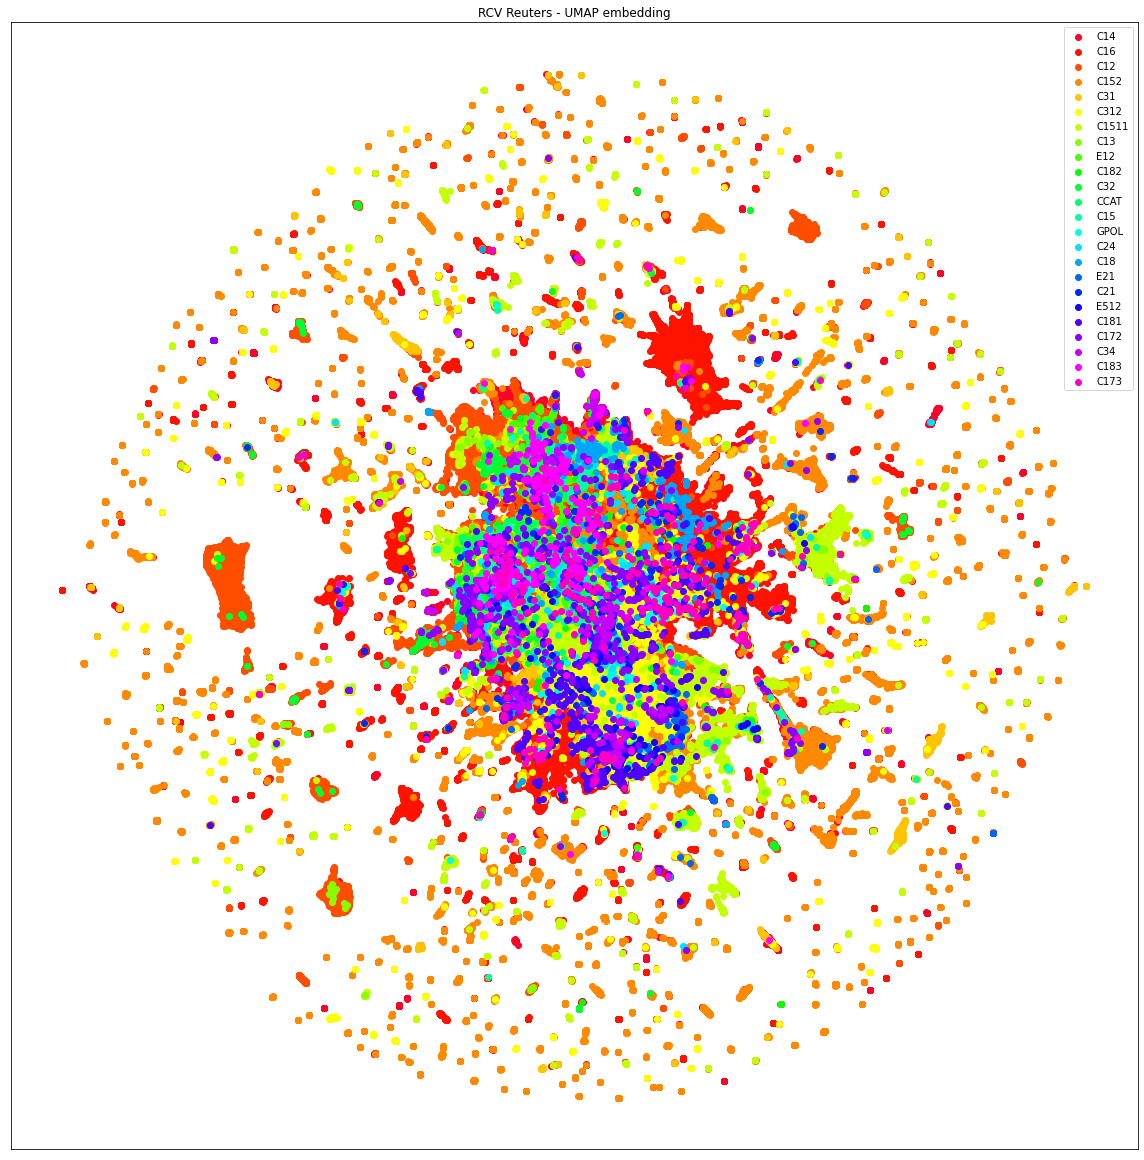

In [8]:
plot_2d_reuters_scatter(reuters_umap, y_reuters, reuters_target_names, 'RCV Reuters - UMAP embedding')

In [12]:
save_embedded_data_to_csv(reuters_umap, 'reuters_umap_embedding')

## RCV Reuters PaCMAP

In [28]:
reuters_pacmap_embedding = pacmap.PaCMAP()
reuters_pacmap = reuters_pacmap_embedding.fit_transform(X_reuters.values)

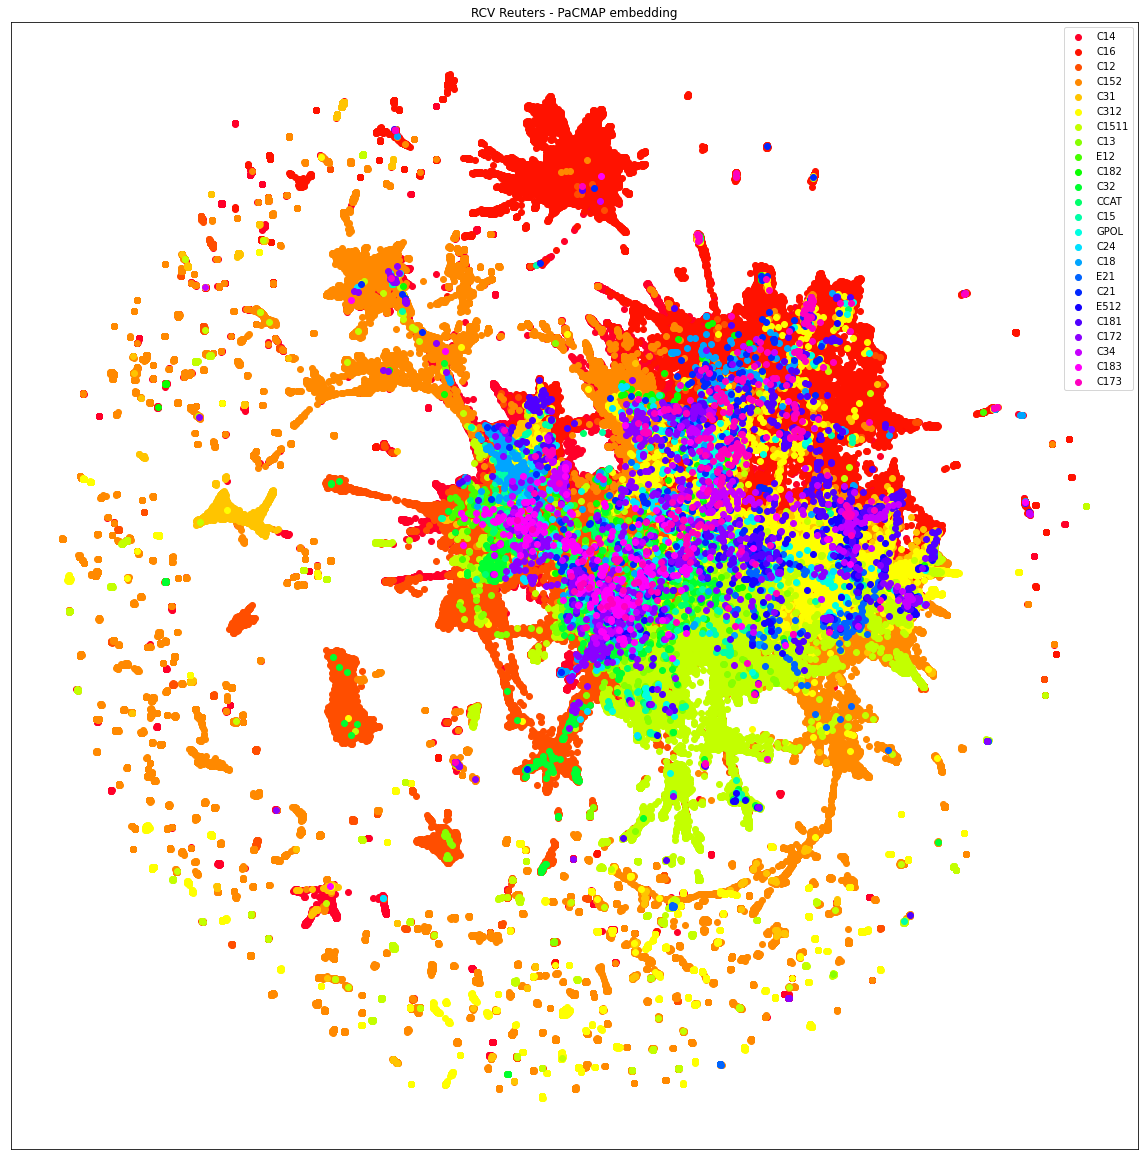

In [29]:
plot_2d_reuters_scatter(reuters_pacmap, y_reuters, reuters_target_names, 'RCV Reuters - PaCMAP embedding')

In [30]:
save_embedded_data_to_csv(reuters_pacmap, 'reuters_pacmap_embedding')

## RCV Reuters IVHD

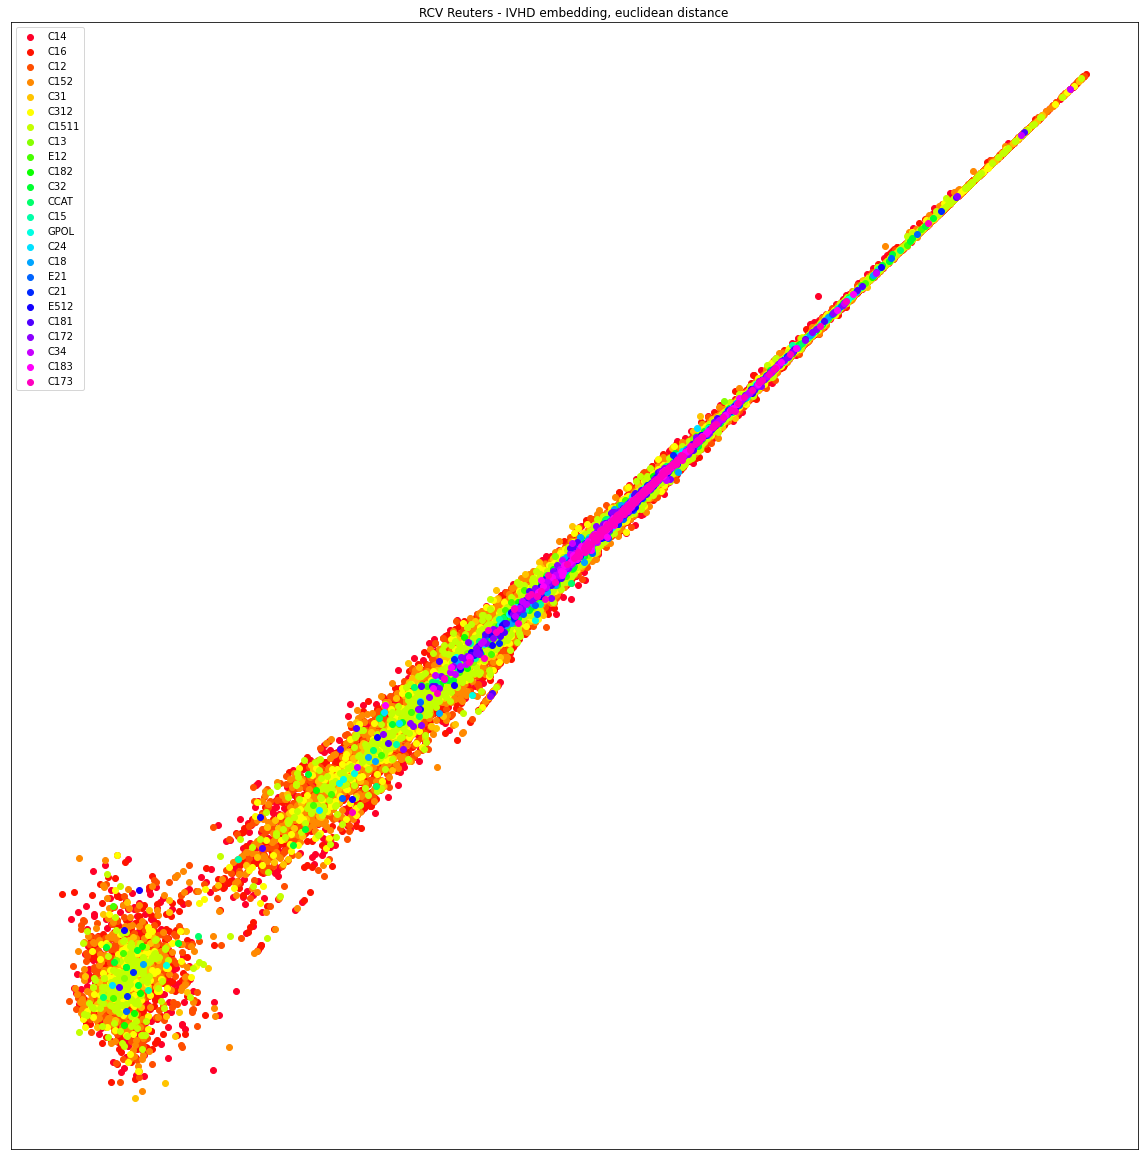

In [38]:
df_reuters_ivhd_euclidean = pd.read_csv(os.path.join(ivhd_path, 'reuters_sample_euclidean_visualization.txt'), header=None)
plot_2d_reuters_scatter(df_reuters_ivhd_euclidean.iloc[:, :2].values, df_reuters_ivhd_euclidean.iloc[:, 2], reuters_target_names, 'RCV Reuters - IVHD embedding, euclidean distance')

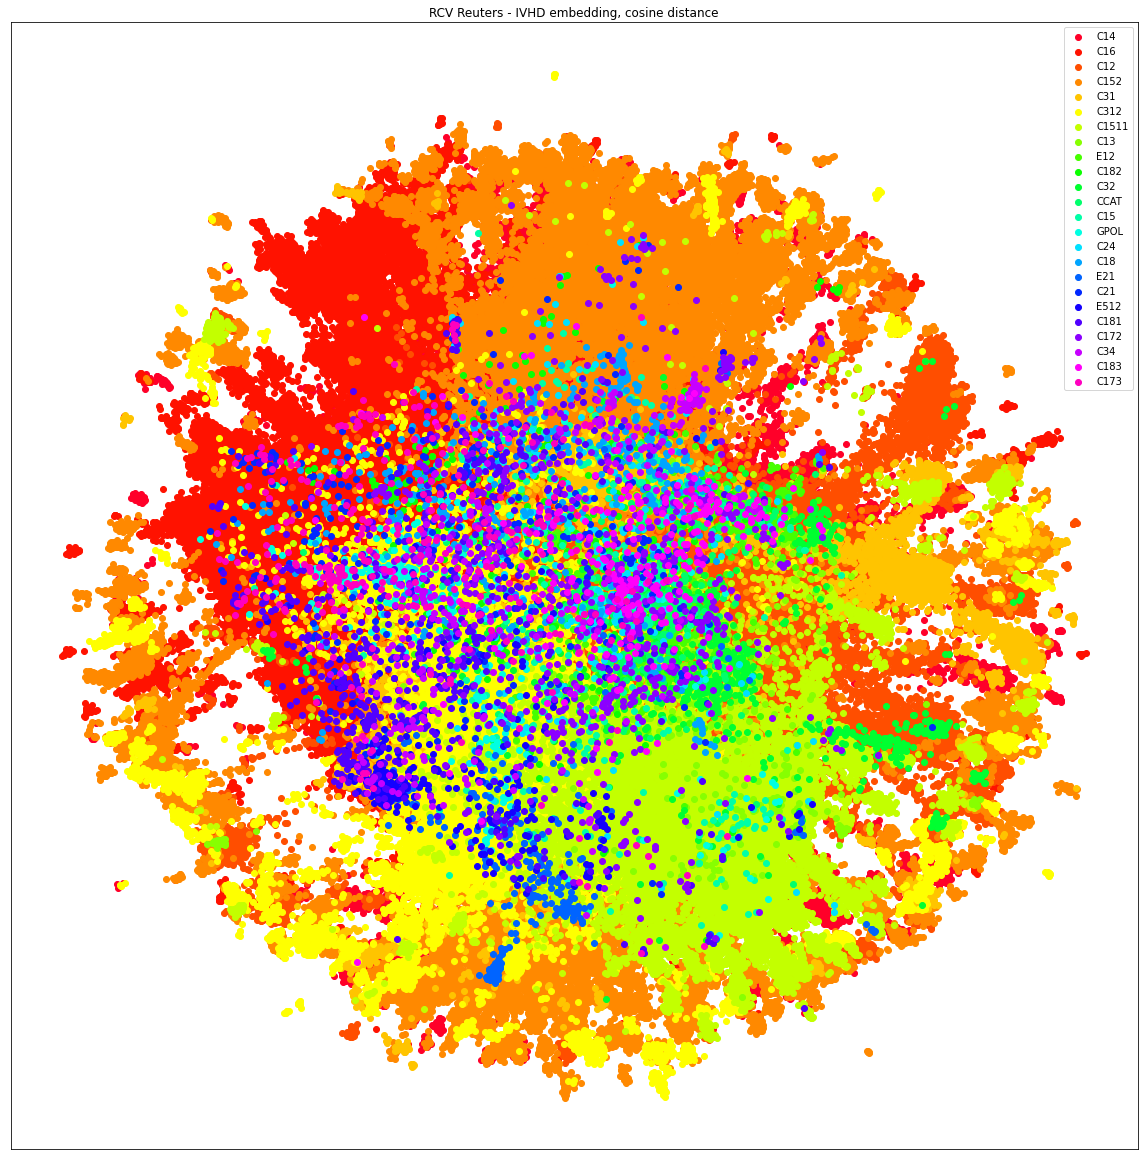

In [10]:
df_reuters_ivhd_cosine = pd.read_csv(os.path.join(ivhd_path, 'reuters_cosine_visualization.txt'), header=None)
plot_2d_reuters_scatter(df_reuters_ivhd_cosine.iloc[:, :2].values, df_reuters_ivhd_cosine.iloc[:, 2], reuters_target_names, 'RCV Reuters - IVHD embedding, cosine distance')

# 20NG

Artykuł z embeddingiem 20NG z użyciem TSNE
https://towardsdatascience.com/clustering-the-20-newsgroups-dataset-with-gpt3-embeddings-10411a9ad150

In [4]:
tng_path = os.path.join(datasets_path, 'tng.csv')
df_20ng = pd.read_csv(tng_path, header=None)
df_20ng_short = df_20ng
X_20ng = df_20ng_short.iloc[:, :-1]
y_20ng = df_20ng_short.iloc[:, -1]
NG20_original = fetch_20newsgroups(subset='all')
target_names=NG20_original.target_names

In [7]:
def plot_2d_20ng_scatter(X, y, target_names, title):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    for i in y.unique():
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"{target_names[i]}")
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.title(title)
    plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(visualizations_path))
    plt.savefig(title + '.png')
    plt.set_cmap('tab20')
    plt.show()

## 20NG TSNE

In [9]:
tng_tsne = TSNE(n_components=2, perplexity=15, random_state=42).fit_transform(X_20ng)

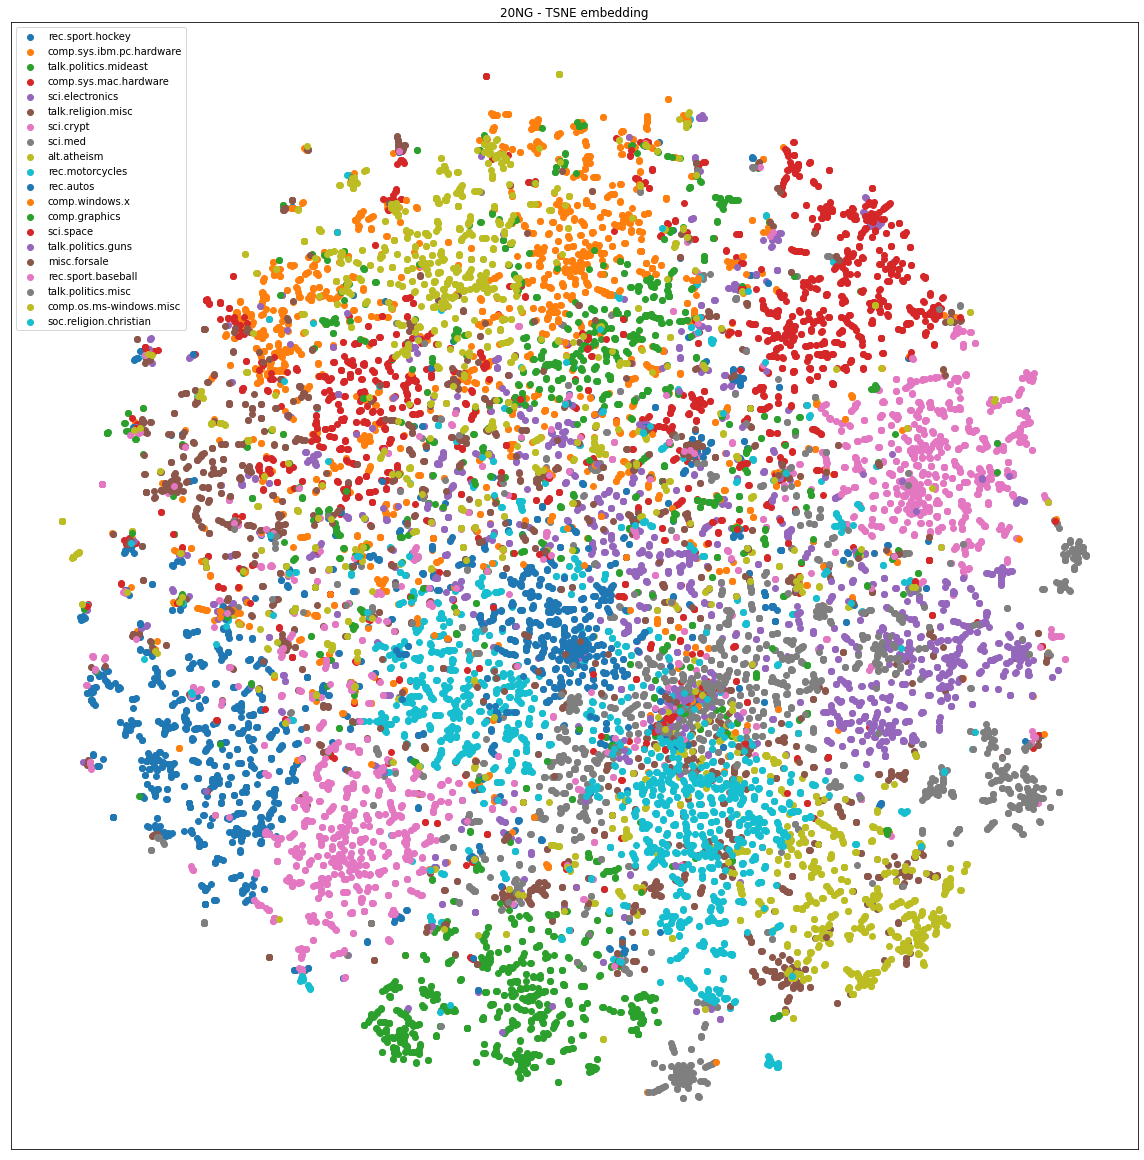

In [10]:
plot_2d_20ng_scatter(tng_tsne, y_20ng, target_names, '20NG - TSNE embedding')

## 20NG UMAP

In [13]:
tng_umap_reducer=UMAP()
tng_umap=tng_umap_reducer.fit_transform(X_20ng)

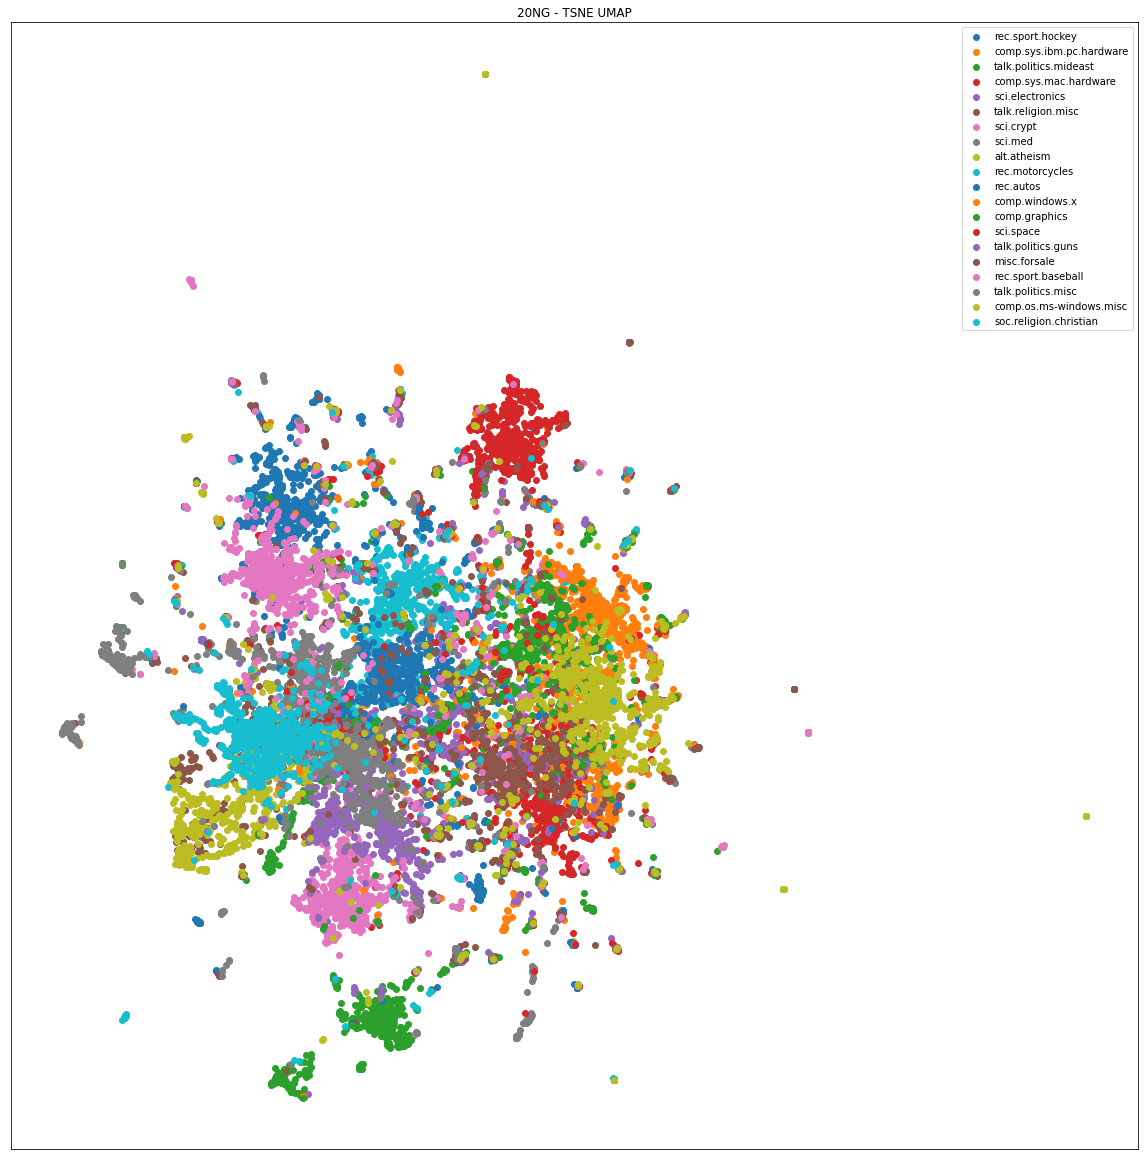

In [14]:
plot_2d_20ng_scatter(tng_umap, y_20ng, target_names, '20NG - TSNE UMAP')

## 20NG Isomap

In [11]:
tng_isomap_embedding = Isomap(n_components=2)
tng_isomap = tng_isomap_embedding.fit_transform(X_20ng)

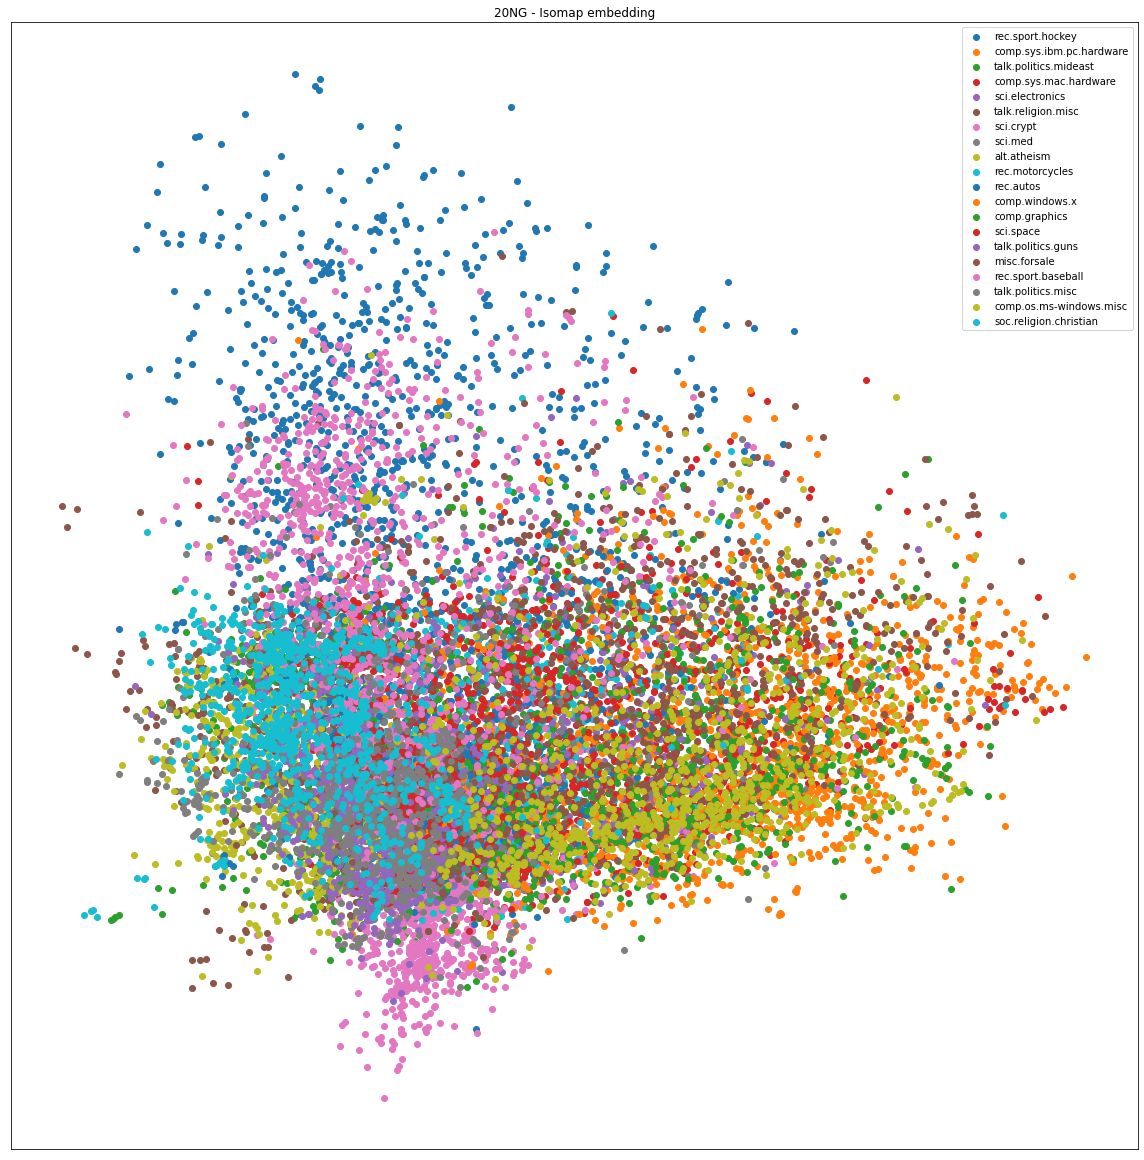

In [12]:
plot_2d_20ng_scatter(tng_isomap, y_20ng, target_names, '20NG - Isomap embedding')

## 20NG IVHD

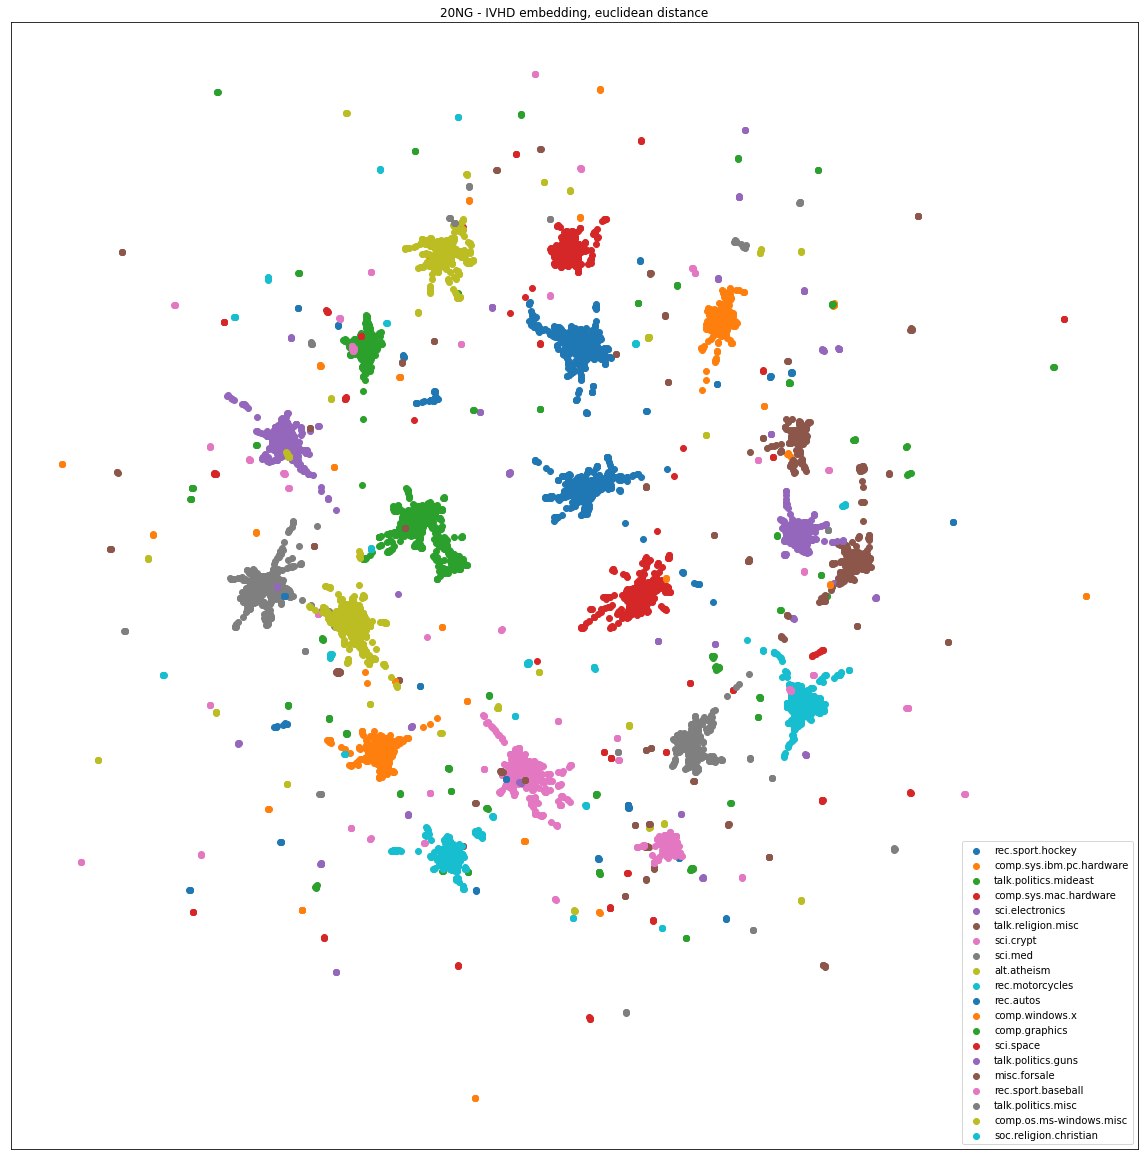

In [21]:
df_20NG_ivhd_euclidean = pd.read_csv(os.path.join(ivhd_path, 'tng_euclidean_visualization.txt'), header=None)
plot_2d_20ng_scatter(df_20NG_ivhd_euclidean.iloc[:, :2].values, df_20NG_ivhd_euclidean.iloc[:, 2], target_names, '20NG - IVHD embedding, euclidean distance')

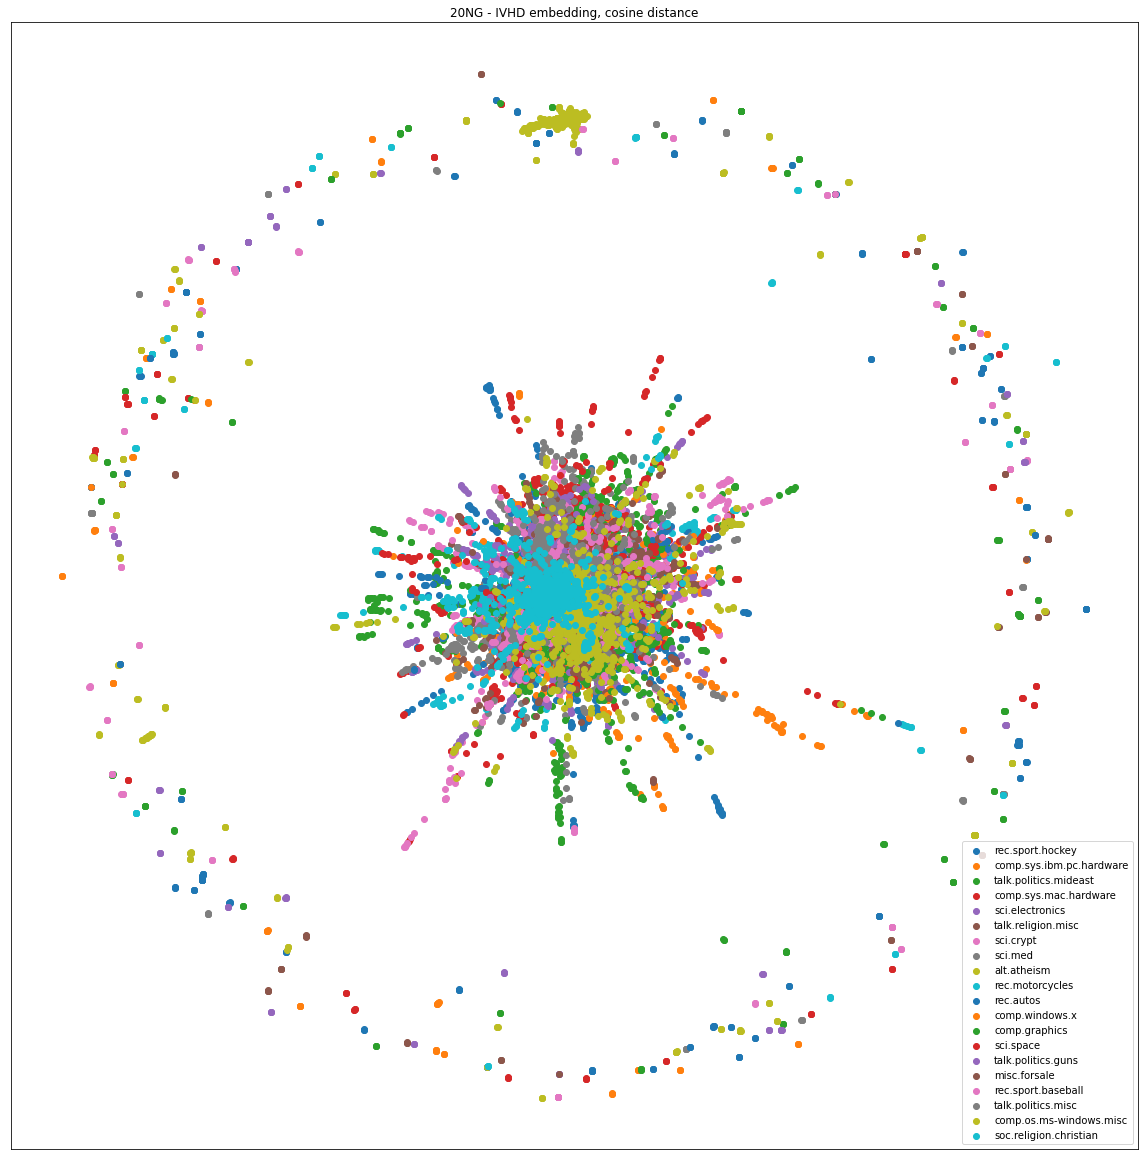

In [22]:
df_20NG_ivhd_cosine = pd.read_csv(os.path.join(ivhd_path, 'tng_cosine_visualization.txt'), header=None)
plot_2d_20ng_scatter(df_20NG_ivhd_cosine.iloc[:, :2].values, df_20NG_ivhd_cosine.iloc[:, 2], target_names, '20NG - IVHD embedding, cosine distance')